# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


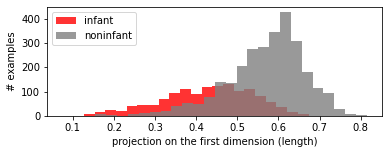

In [12]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)
print(abalone)

# Project data on the first dimension (autrement dit sur le premier critère, la taille)
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [13]:
def fischer(X1,X2): 
    mean_difference = np.absolute(
        X1.mean(axis=0) - X2.mean(axis=0)
    )
    s_w = (X1.var(axis=0) + X2.var(axis=0)).sum(axis=0)
    print((mean_difference/s_w).type())
    return mean_difference/s_w

def objective(X1,X2,w): 
    s_w       = (X1.var(axis=0) + X2.var(axis=0)).sum(axis=0) #Emma me dit de ne pas garder le sum mais je verrai plus tard
    s_b       = numpy.dot((X1.means(axis=0) - X2.means(axis=0)),(X1.means(axis=0) - X2.means(axis=0)))
    #J'ai un indent de trop immédiatement ici je ne comprends pas pourquoi
    s_b_tilde = w@s_b@w
    s_w_tilde = w@s_w@w
    #La fonction objective est le produit des valeurs absolues de s_b et s_w tilde
    j_of_w    = numpy.absolute(s_b_tilde) / numpy.absolute(s_w_tilde)
    return j_of_w

def phi(x):
    
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-13-350bce9a8597>, line 23)

In [14]:
#Basé sur Emma's : on a utiliser des formules différentes, je pense que la sienne est celle qu'on doit utiliser meme si je comprends pas pourquoi

def fisher(X1,X2):
    mean_difference = np.absolute(
        X1.mean(axis=0) - X2.mean(axis=0)
    )
    # not surif we should take the square root
    sum_variation = (X1.var(axis=0) + X2.var(axis=0))
    return (mean_difference)/sum_variation
    
def objective(X1,X2,w):
    sum_variation = (X1.var(axis=0) + X2.var(axis=0)).sum(axis=0)
    return (X1.mean(axis=0)/sum_variation - X2.mean(axis=0)/sum_variation)**2
    

In [15]:


def fischer1(X1,X2): #Ma version : pas besoin de monter au carré on utilise le w deja optimisé ... valeur **2 donc positives
    mean_diff = numpy/asbolute(
        X1.means(axis=0) - X2.means(axis=0)
    )
    s_w = (X1.var(axis=0) + X2.var(axis=0))
    s_b = numpy.dot((X1 - X2),(X1 - X2))
    w_opti = mean_diff / s_w
    criterion_function = (numpy.dot(numpy.dot(w_opti,S_b),w_opti))**2/(numpy.dot(numpy.dot(w_opti,S_w),w_opti))
    return criterion_function

def fisher2(X1,X2): #Version comme Emma mais avec les mean_diff au carré
    mean_difference = np.absolute(
        X1.mean(axis=0) - X2.mean(axis=0)
    )
    # not surif we should take the square root
    s_w = (X1.var(axis=0) + X2.var(axis=0)).sum(axis=0)
    return (mean_difference**2)/s_w
    
def objective(X1,X2,w):
    mean_total = (X1.means(axis=0) + X2.means(axis=0)).means(axis=0)
    s_w_96 = (numpy.dot((X1.means(axis=0) - mean_total),(X1.means(axis=0) - mean_total))) + (numpy.dot((X2.means(axis=0) - mean_total),(X2.means(axis=0) - mean_total)))
    return s_w_96
    
def objective2(X1,X2,w): #Je ne change rien, c'est bien la formule à trouver (pas d'ambiguïté)
    s_w = (X1.var(axis=0) + X2.var(axis=0)).sum(axis=0)
    return (X1.mean(axis=0)/sum_variation - X2.mean(axis=0)/sum_variation)**2    

In [16]:

def sqr_mat(X):
    import numpy as np
    X = np.array(list(range(1,10)))
    new_list = []
    #pour faire d'un produit d'array une matrice carré comme on la connait : 
    for i in range(1,len(X)+1):
        new_list.append(list(X*[i]))
        XX = np.array(new_list)
    print("XX is : \n", XX)


#La correction du prof : 

In [33]:
import numpy as np

def SW(X): #The within class scatter matrix
    Z = X - X.mean(axis=0)
    return np.dot(Z.T,Z)  

#Produit matriciel de Z par Z, matrice contenant les valeurs des classes moins leurs moyennes
#Ca correspond à faire le carré des différences entre les réalisations de chaque classe et la moyenne de la
#classe correspondate. Donc le 'scatter' pour chaque classe.
#On précisera sur quelle conlasse on fait cette variance en choississant l'input, e bas X1 et X2 our les classes 1 et 2

def fisher(X1,X2): #Within class scatter matrix inverse *times* the difference of means 
    sw = SW(X1) + SW(X2)
    dm = X2.mean(axis=0) - X1.mean(axis=0)
    w  = numpy.linalg.inv(sw).dot(dm) #w* = Sw^-1 * (diff de means) : Voir cours pr derivatoin de la formule
    w / (w**2).sum()**.5   #norme de w ... Somme des 
    return w
    
def objective(X1,X2,w):
    sw = SW(X1) + SW(X2)
    dm   = X2.mean(axis=0) - X1.mean(axis=0)
    wSBw = (w.dot(dm))**2
    wSWw = sw.dot(w).dot(w)
    return wSBw / wSWw

#Process the data : makes it higher dimensional to better separates the centers
def expand(X):
    ind = np.triu_indices(X.shape[1])
    X   = numpy.array(
    [
        np.concatenate([X, np.outer(X,X)[ind] ]) for X in X
        #numpy.outer(a, b) : compute the outer product of the vectors a and b
        #retourne une matrix de tout les ai*bj pour tout i, j ... 
    ])
    
    
    
    
    

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

0.00047979575003284755


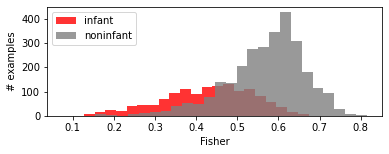

0.0004995753519750719


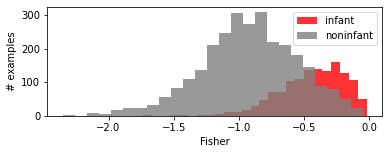

0.0005691815990406671


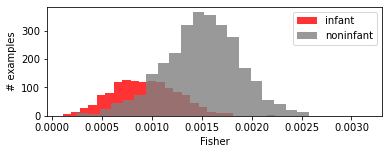

AttributeError: 'NoneType' object has no attribute 'mean'

In [34]:
#Canoncial coordinate vector : Exactement ce qu'il en est : des coordonnées dans un espace pour un point

%matplotlib inline

data = utils.Abalone()

#Canonical vector : 
#W project onto the direction of the canonical 
w = np.array([1.0,0,0,0,0,0,0])
print(objective(data.I, data.N,w))
data.plot(w,'Fisher')

#difference of means vectors of the two classes: 
w = data.I.mean(axis=0)-data.N.mean(axis=0)
print(objective(data.I, data.N,w))
data.plot(w,'Fisher')

#With the fisher linear discriminant : 
w = fisher(data.I,data.N)
print(objective(data.I, data.N,w))
data.plot(w,'Fisher')

#Fisher linear discriminant, expanded data : augmenation de la complexité
w = fisher(expand(data.I),expand(data.N))
print(objective(expand(data.I),expand(data.N),w))
data.I = expand(data.I)
data.N = epand(data.N)
data.plot(w,'Fisher Q')



### Pour l'interpretation : regarder les différences dans la séparabilité, et la dispersion autour des moyennes. 

Le but étant d'augmenter la séparabilité entre les moyennes et de diminuer la dispersion, pour eviter que trop d'obervations ne se superposent et ne soit donc, mal identifiées.

Revoir dans les détails ce que sont les fomrules rentrées par les différents codes ci dessus. 